In [20]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from collections import Counter

def load_json_dataset(folder_path):
    data, labels = [], []
    label_to_idx = {}
    idx = 0
    for pose_folder in os.listdir(folder_path):
        pose_path = os.path.join(folder_path, pose_folder)
        if not os.path.isdir(pose_path):
            continue
        for video_folder in os.listdir(pose_path):
            video_path = os.path.join(pose_path, video_folder)
            if not os.path.isdir(video_path):
                continue
            for filename in os.listdir(video_path):
                if filename.endswith('.json'):
                    try:
                        with open(os.path.join(video_path, filename), 'r') as f:
                            json_data = json.load(f)
                            for _, info in json_data.items():
                                if 'features' not in info or 'label' not in info:
                                    continue
                                data.append(info['features'])
                                label = info['label']
                                if label not in label_to_idx:
                                    label_to_idx[label] = idx
                                    idx += 1
                                labels.append(label_to_idx[label])
                    except json.JSONDecodeError:
                        continue

    return np.array(data, dtype=np.float32), np.array(labels), label_to_idx


# === 1. Load dữ liệu ===
train_folder = r"processed_data\results_posekeypoints_mlp\step5"
test_folder = r"processed_data\Pose keypoints + MLP\step5"

X_train, y_train, label_to_idx = load_json_dataset(train_folder)
X_test, y_test, _ = load_json_dataset(test_folder)
idx_to_label = {v: k for k, v in label_to_idx.items()}

print(f"Số mẫu train: {X_train.shape[0]}, test: {X_test.shape[0]}")
print(f"Số chiều đặc trưng mỗi mẫu: {X_train.shape[1]}")


Số mẫu train: 14643, test: 4152
Số chiều đặc trưng mỗi mẫu: 20


In [21]:
# Đường dẫn thư mục
root_dir = 'dataset/train'
out_dir = 'processed_data/frames'

# Thống kê số video và frame
def count_dataset_stats(root_dir, out_dir):
    # Đếm video
    video_counts = {}
    total_videos = 0
    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        if not os.path.isdir(label_dir):
            continue
        video_files = [f for f in os.listdir(label_dir) if f.endswith('.mp4')]
        video_counts[label] = len(video_files)
        total_videos += len(video_files)

    # Đếm frame (nếu có)
    frame_counts = {}
    total_frames = 0
    if os.path.exists(out_dir):
        for label in os.listdir(out_dir):
            label_dir = os.path.join(out_dir, label)
            if not os.path.isdir(label_dir):
                continue
            frame_counts[label] = 0
            for video_folder in os.listdir(label_dir):
                video_path = os.path.join(label_dir, video_folder)
                if not os.path.isdir(video_path):
                    continue
                num_frames = len([f for f in os.listdir(video_path) if f.endswith('.jpg')])
                frame_counts[label] += num_frames
                total_frames += num_frames

    # In kết quả
    print("=== Thống kê dữ liệu train ===")
    print(f"Tổng số video: {total_videos}")
    print("Số video theo nhãn:")
    for label, count in sorted(video_counts.items()):
        print(f"{label}: {count} video")
    
    if frame_counts:
        print(f"\nTổng số frame đã trích xuất: {total_frames}")
        print("Số frame theo nhãn:")
        for label, count in sorted(frame_counts.items()):
            print(f"{label}: {count} frame")
    else:
        print("\nChưa có frame nào được trích xuất")

# Chạy thống kê
count_dataset_stats(root_dir, out_dir)

=== Thống kê dữ liệu train ===
Tổng số video: 56
Số video theo nhãn:
Bhujasana: 12 video
Padamasana: 11 video
Tadasana: 12 video
Trikasana: 10 video
Vrikshasana: 11 video

Tổng số frame đã trích xuất: 5013
Số frame theo nhãn:
Bhujasana: 1025 frame
Padamasana: 931 frame
Tadasana: 1065 frame
Trikasana: 911 frame
Vrikshasana: 1081 frame


In [22]:
# Đường dẫn thư mục
root_dir = 'dataset/test'
out_dir = 'processed_data/frames_test'

# Thống kê số video và frame
def count_dataset_stats(root_dir, out_dir):
    # Đếm video
    video_counts = {}
    total_videos = 0
    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        if not os.path.isdir(label_dir):
            continue
        video_files = [f for f in os.listdir(label_dir) if f.endswith('.mp4')]
        video_counts[label] = len(video_files)
        total_videos += len(video_files)

    # Đếm frame (nếu có)
    frame_counts = {}
    total_frames = 0
    if os.path.exists(out_dir):
        for label in os.listdir(out_dir):
            label_dir = os.path.join(out_dir, label)
            if not os.path.isdir(label_dir):
                continue
            frame_counts[label] = 0
            for video_folder in os.listdir(label_dir):
                video_path = os.path.join(label_dir, video_folder)
                if not os.path.isdir(video_path):
                    continue
                num_frames = len([f for f in os.listdir(video_path) if f.endswith('.jpg')])
                frame_counts[label] += num_frames
                total_frames += num_frames

    # In kết quả
    print("=== Thống kê dữ liệu test ===")
    print(f"Tổng số video: {total_videos}")
    print("Số video theo nhãn:")
    for label, count in sorted(video_counts.items()):
        print(f"{label}: {count} video")
    
    if frame_counts:
        print(f"\nTổng số frame đã trích xuất: {total_frames}")
        print("Số frame theo nhãn:")
        for label, count in sorted(frame_counts.items()):
            print(f"{label}: {count} frame")
    else:
        print("\nChưa có frame nào được trích xuất")

# Chạy thống kê
count_dataset_stats(root_dir, out_dir)

=== Thống kê dữ liệu test ===
Tổng số video: 15
Số video theo nhãn:
Bhujasana: 3 video
Padamasana: 3 video
Tadasana: 3 video
Trikasana: 3 video
Vrikshasana: 3 video

Tổng số frame đã trích xuất: 1438
Số frame theo nhãn:
Bhujasana: 303 frame
Padamasana: 269 frame
Tadasana: 284 frame
Trikasana: 264 frame
Vrikshasana: 318 frame


In [23]:
# === 2. Thống kê mô tả ===
print("\n=== Thống kê mô tả đặc trưng ===")
train_stats = pd.DataFrame(X_train).describe()
test_stats = pd.DataFrame(X_test).describe()
print("\nThống kê tập train:")
print(train_stats)
print("\nThống kê tập test:")
print(test_stats)


=== Thống kê mô tả đặc trưng ===

Thống kê tập train:
                 0             1             2             3             4   \
count  1.464300e+04  1.464300e+04  1.464300e+04  1.464300e+04  1.464300e+04   
mean   1.302567e-09  5.210267e-10 -2.344620e-09 -1.823594e-09 -1.172310e-09   
std    1.000034e+00  9.261046e-01  9.104862e-01  1.000034e+00  1.000034e+00   
min   -7.768635e+00 -8.493329e+00 -8.902308e+00 -8.102536e+00 -7.407257e+00   
25%   -5.422607e-01 -2.422258e-01 -2.572700e-01 -4.588941e-01 -4.063520e-01   
50%   -5.890457e-03  0.000000e+00  0.000000e+00  1.346616e-01  8.020187e-02   
75%    5.585069e-01  4.386305e-01  4.368291e-01  5.468469e-01  5.407531e-01   
max    6.019693e+00  9.165152e+00  4.792028e+00  6.481090e+00  5.189941e+00   

                 5             6             7             8             9   \
count  1.464300e+04  1.464300e+04  1.464300e+04  1.464300e+04  1.464300e+04   
mean   5.210267e-09 -7.815401e-10 -7.294374e-09  3.647187e-09 -1.953850e-10

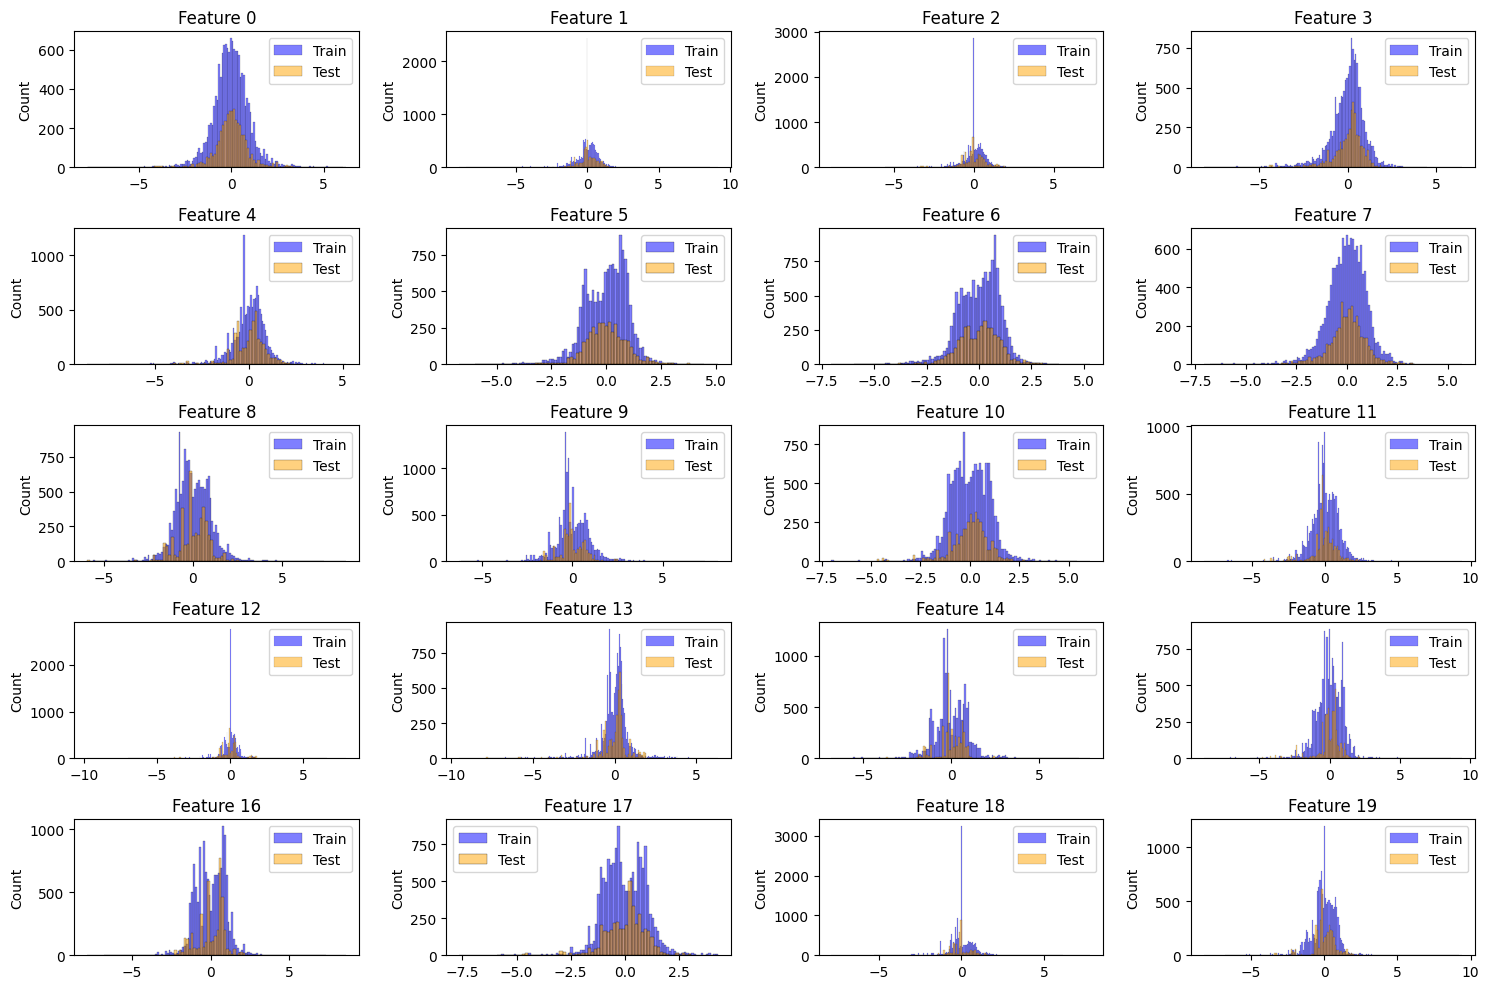

In [24]:
# === 3. Phân phối đặc trưng ===
num_features = X_train.shape[1]
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for i in range(min(num_features, 20)):
    sns.histplot(X_train[:, i], ax=axes[i], color='blue', alpha=0.5, label='Train')
    sns.histplot(X_test[:, i], ax=axes[i], color='orange', alpha=0.5, label='Test')
    axes[i].set_title(f'Feature {i}')
    axes[i].legend()
plt.tight_layout()
plt.show()

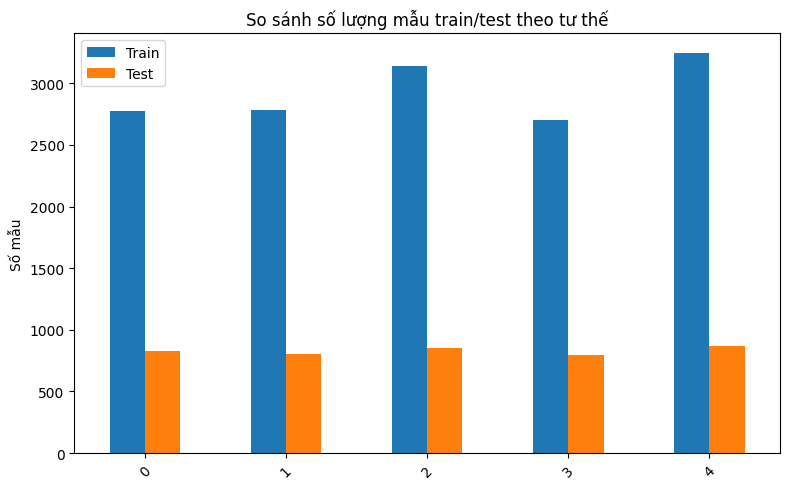

In [25]:
# === 7. Phân phối lớp ===
train_counts = pd.Series(y_train).map(idx_to_label).value_counts()
test_counts = pd.Series(y_test).map(idx_to_label).value_counts()
df_counts = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)
df_counts.plot(kind='bar', figsize=(8,5))
plt.title("So sánh số lượng mẫu train/test theo tư thế")
plt.ylabel("Số mẫu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

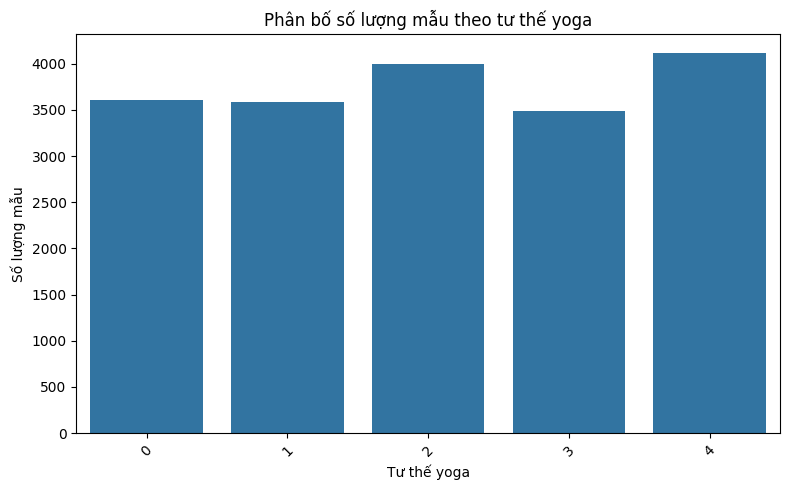

In [26]:
# === 2. Phân bố nhãn ===
y_all = np.concatenate([y_train, y_test])
label_counts = pd.Series(y_all).map(idx_to_label).value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Phân bố số lượng mẫu theo tư thế yoga")
plt.xlabel("Tư thế yoga")
plt.ylabel("Số lượng mẫu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eda_pose_label_distribution.png")
plt.show()

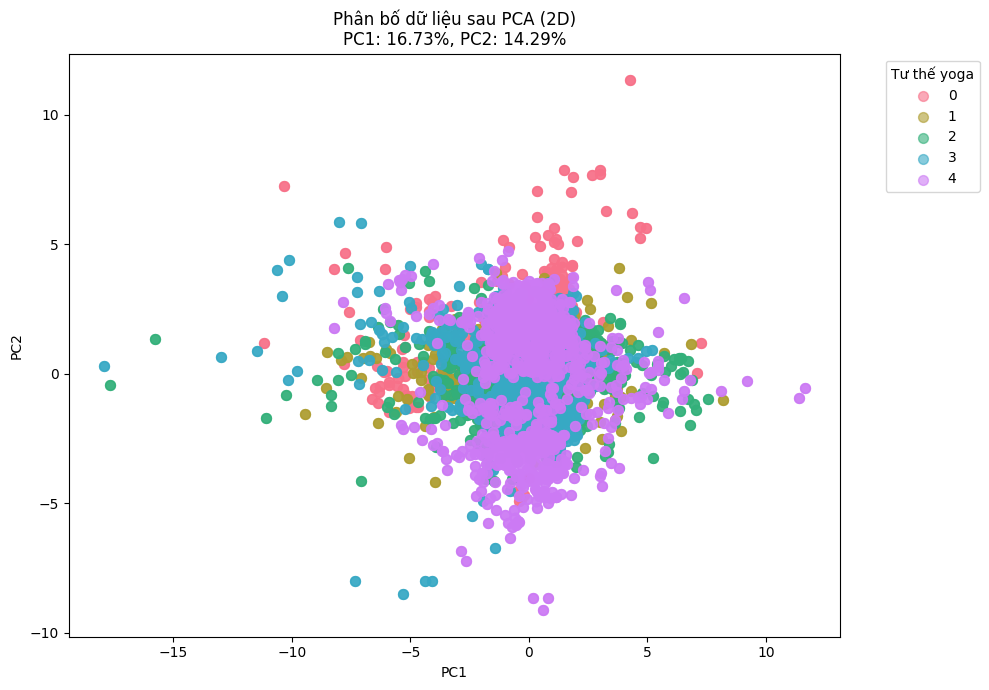

In [28]:
# Kết hợp dữ liệu train và test
X_all = np.concatenate([X_train, X_test])

# Áp dụng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

# Tạo biểu đồ
plt.figure(figsize=(10, 7))
colors = sns.color_palette("husl", len(np.unique(y_all)))  # Palette màu phân biệt

for label_id, color in zip(np.unique(y_all), colors):
    idx = y_all == label_id
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=idx_to_label[label_id], 
                alpha=0.6, s=50, color=color)

# Thêm thông tin tỷ lệ phương sai giải thích
explained_variance_ratio = pca.explained_variance_ratio_
plt.title(f"Phân bố dữ liệu sau PCA (2D)\nPC1: {explained_variance_ratio[0]:.2%}, PC2: {explained_variance_ratio[1]:.2%}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Tư thế yoga", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()